In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()
# 取出空手道俱乐部的数据集

adjacency_matrix = nx.adjacency_matrix(G).todense()
# 获取图的邻接矩阵并将其转为稠密矩阵形式

features = torch.eye(G.number_of_nodes())
# 再使用独热编码进行特征的创建(因为这个数据集很简单 所以需要这样做来创建训练特征

labels = torch.tensor([0 if G.nodes[i]['club']== 'Mr. Hi' else 1 for i in range(G.number_of_nodes())], dtype=torch.long)
# 将不同派系的队员打上0或1的标签

In [3]:
class BasicGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(BasicGNN, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, num_classes)
        # 进行两次线性变换
    
    def forward(self, adjacency, feature):
        h = torch.mm(adjacency, feature)
        h = F.relu(self.linear1(h))
        h = torch.mm(adjacency, h)
        h = self.linear2(h)
        return h
        # 将两个矩阵相乘来融合特征 通过线性变换后使用relu引入非线性

In [4]:
net = BasicGNN(input_dim = features.shape[1], hidden_dim=16, num_classes=2)
# 初始化GNN模型

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
# 定义优化器和损失函数

In [5]:
for epoch in range(20):
    logits = net(torch.tensor(adjacency_matrix, dtype=torch.float32), features)
    # 将两个特征矩阵传入网络进行训练
    
    loss = loss_fn(logits, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss:.4f}')

Epoch: 1, Loss: 4.1610
Epoch: 2, Loss: 1.7395
Epoch: 3, Loss: 0.6831
Epoch: 4, Loss: 0.2101
Epoch: 5, Loss: 0.0902
Epoch: 6, Loss: 0.0490
Epoch: 7, Loss: 0.0303
Epoch: 8, Loss: 0.0238
Epoch: 9, Loss: 0.0289
Epoch: 10, Loss: 0.0394
Epoch: 11, Loss: 0.0461
Epoch: 12, Loss: 0.0414
Epoch: 13, Loss: 0.0298
Epoch: 14, Loss: 0.0178
Epoch: 15, Loss: 0.0112
Epoch: 16, Loss: 0.0093
Epoch: 17, Loss: 0.0094
Epoch: 18, Loss: 0.0100
Epoch: 19, Loss: 0.0106
Epoch: 20, Loss: 0.0110


In [6]:
with torch.no_grad():
    logits = net(torch.tensor(adjacency_matrix, dtype=torch.float32), features)
    # 只进行一次前向传播
    
    predict = torch.argmax(logits, dim=1)
    # 取出得分最高的节点
    
    accuracy = (predict == labels).float().mean()
    print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%


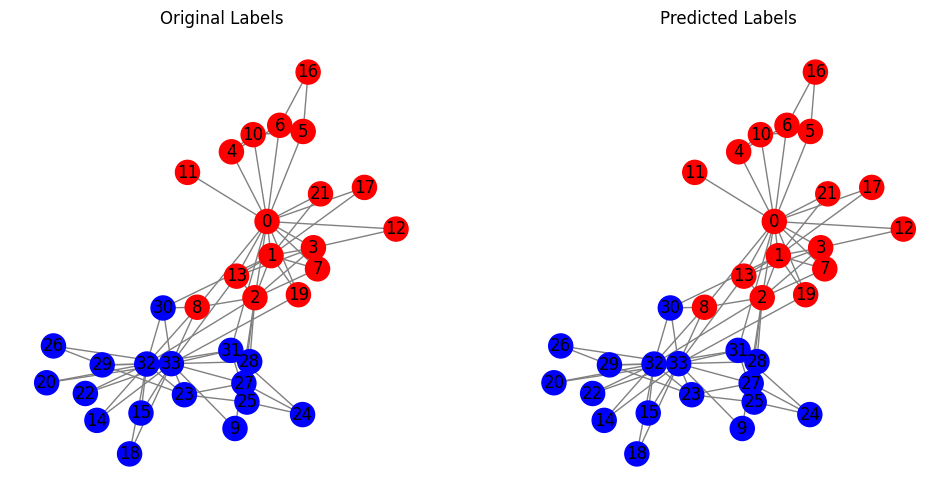

In [14]:
pos = nx.spring_layout(G, seed=666)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
node_colors = ['red' if labels[i]==0 else 'blue' for i in range(len(labels))]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray')
plt.title('Original Labels')

plt.subplot(1, 2, 2)
predicted_colors = ['red' if predict[i]==0 else 'blue' for i in range(len(predict))]
nx.draw(G, pos, with_labels=True, node_color=predicted_colors, edge_color='gray')
plt.title('Predicted Labels')

plt.show()